Here, we will look about different weights initialization methods in PyTorch for a Deep Neural Network.

## Initialization with Same Weights

In [1]:
# Import the necessary libraries

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np

#Set the manual seed for random values
torch.manual_seed(0)

Function for plotting the model


In [2]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

### Neural Network Module and Training Function

Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 


In [3]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

Define the training function:


In [4]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

### Make Some Data

In [5]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

### Define the Neural Network with Same Weights Initialization define, Criterion Function, Optimizer and Train the Model

Create the Cross-Entropy loss function: 


In [6]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define the Neural Network


In [7]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)


This is the PyTorch default installation


In [8]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0075],
                      [ 0.5364]])),
             ('linear1.bias', tensor([-0.8230, -0.7359])),
             ('linear2.weight', tensor([[-0.2723,  0.1896]])),
             ('linear2.bias', tensor([-0.0140]))])

Same Weights Initialization with all ones for weights and zeros for the bias.


In [9]:
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

Optimizer, and Train the Model:


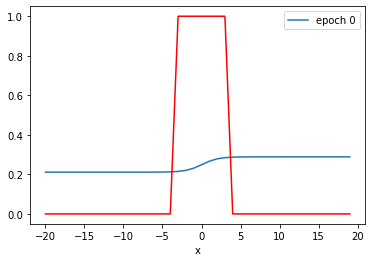

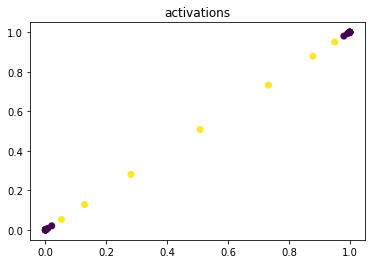

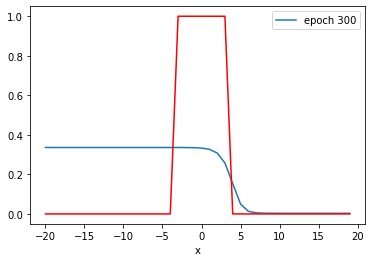

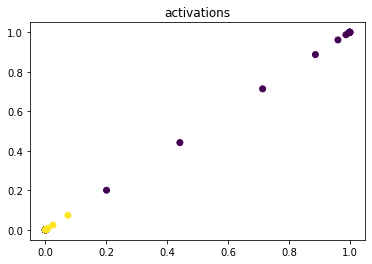

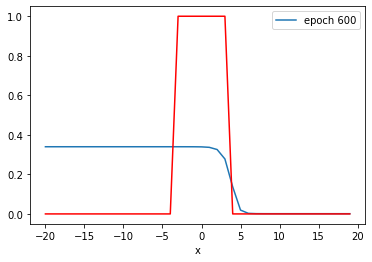

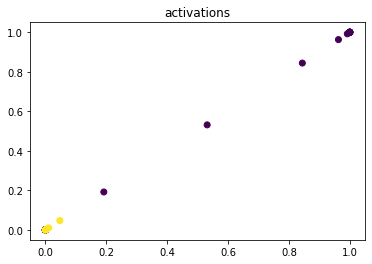

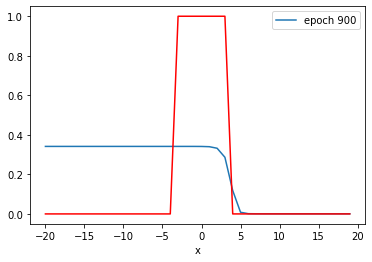

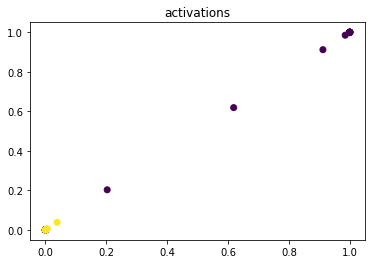

Text(0.5, 1.0, 'cross entropy loss')

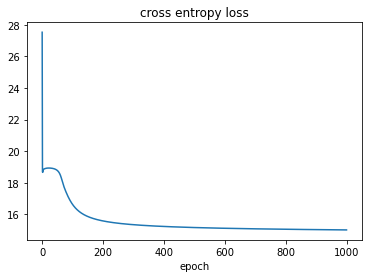

In [10]:
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  paramters all thought they have changed they are identical.


In [11]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.9340],
                      [1.9340]])),
             ('linear1.bias', tensor([-9.0725, -9.0725])),
             ('linear2.weight', tensor([[-3.3976, -3.3976]])),
             ('linear2.bias', tensor([-0.6546]))])

In [12]:
yhat=model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

tensor([[0.3420],
        [0.3418],
        [0.3337]], grad_fn=<SigmoidBackward0>)

<h3 id="Train2">Define the Neural Network, Criterion Function, Optimizer and Train the Model </h3>


In [15]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#Set the criterion
criterion_mse = nn.MSELoss()

Repeat the previous steps above by using the MSE cost or total loss: 


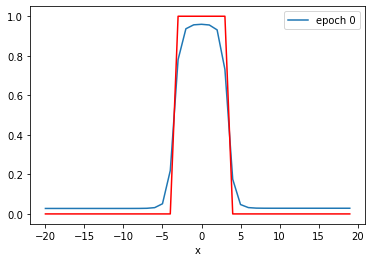

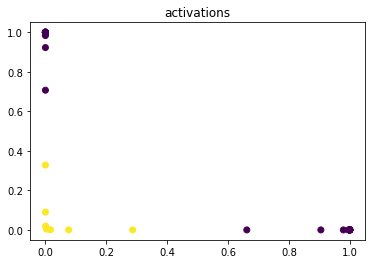

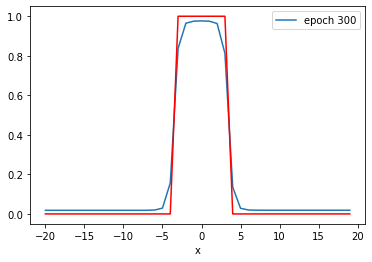

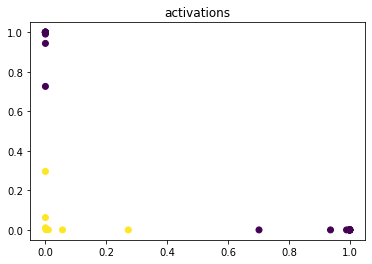

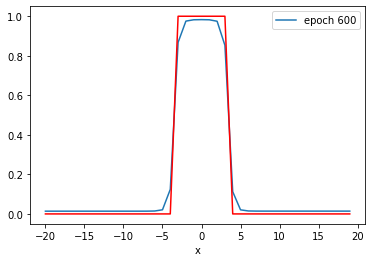

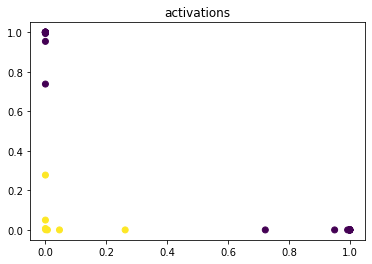

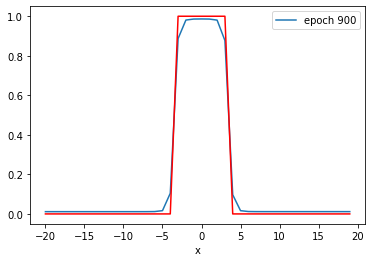

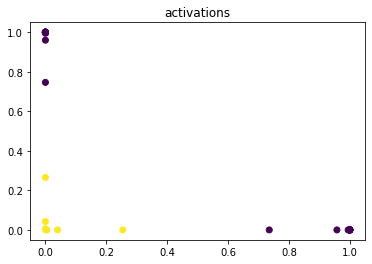

Text(0.5, 1.0, 'cross entropy loss')

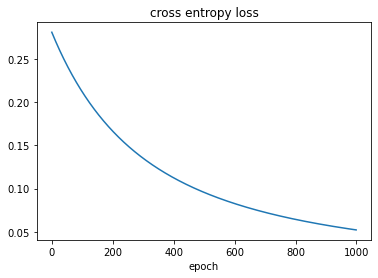

In [21]:
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y.reshape(-1, 1), X, model, optimizer, criterion_mse, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

We can conclude that default initialization was better than initialization with same weights.